<a href="https://colab.research.google.com/github/mflechl/colab-genai-simple/blob/main/stable-diffusion-2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install diffusers==0.11.1
!pip -q install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.8 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableDiffusionPipeline

# pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [3]:
# move pipeline to GPU
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

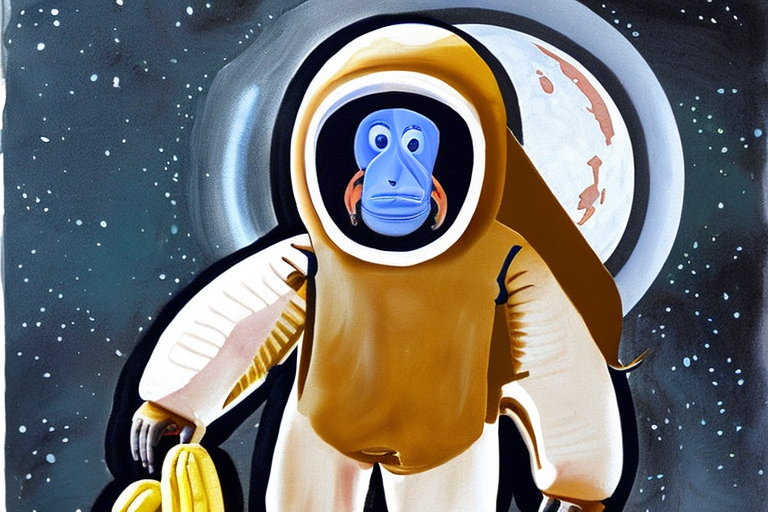

In [4]:
# torch.cuda.empty_cache()

generator = torch.Generator("cuda").manual_seed(42)  # set seed for reproducible results
prompt = "a painting of a monkey on mars in a spacesuit eating a banana in the style of Dalí"

num_steps=50
height=512
width=768

image = pipe(prompt, num_inference_steps=num_steps, height=height, width=width, generator=generator).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
# image.save(f"monkey_on_mars.png")

# In Colab you can directly display it with
image

In [6]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

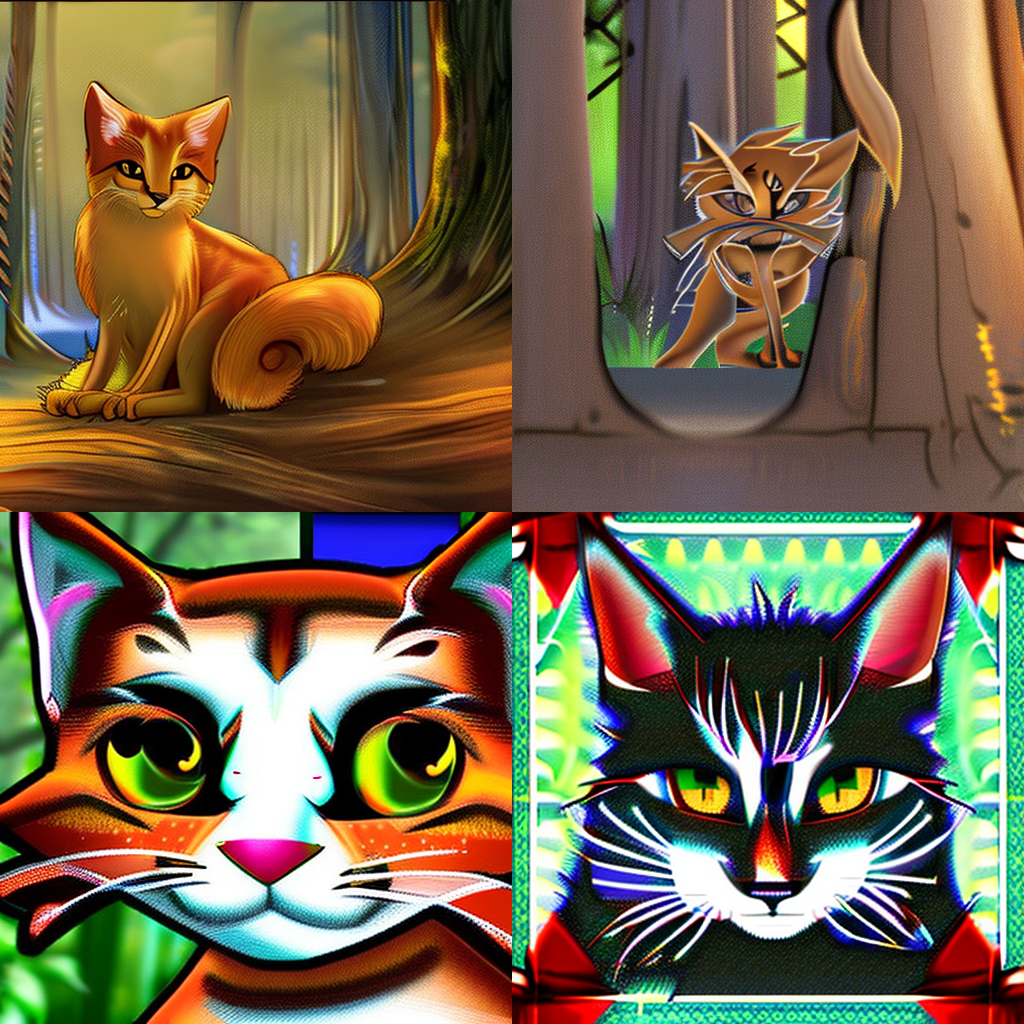

In [7]:
# this might not work on Colab due to insufficient memory if you make the pics larger...
# you may be lucky, or pick a model that uses less memory

torch.cuda.empty_cache()

num_cols = 2
num_rows = 2

generator = torch.Generator("cuda").manual_seed(42)  # set seed for reproducible results
prompt = ["a photograph of firestar from warrior cats in a forest"] * num_cols

all_images = []
for i in range(num_rows):
  images = pipe(prompt, num_inference_steps=50, height=512, width=512, generator=generator).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid